## SQL vs Spark

Examples borrowed from:
    * https://github.com/sbartek/intro-to-pyspark
    * https://github.com/carloapp2/SparkPOT.git
    
See doc on: http://spark.apache.org/docs/latest/api/python/pyspark.sql.html#

Data comes from 
<https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data>

In [4]:
## Check if spark session is defined
## Otherwise create one with
#from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName("PySparkShell").getOrCreate()
spark

In [ ]:
!wget https://raw.githubusercontent.com/JulienCojan/pyspark_kschool/master/data/competitive-data-science-predict-future-sales/sales_train.csv.gz -P data/

# Dataframe

In [5]:
sales_sdf = spark\
    .read\
    .option("header", "true")\
    .csv("data/sales_train.csv.gz")

In [6]:
sales_sdf.printSchema()

root
 |-- date: string (nullable = true)
 |-- date_block_num: string (nullable = true)
 |-- shop_id: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- item_price: string (nullable = true)
 |-- item_cnt_day: string (nullable = true)



In [3]:
sales_sdf.show(truncate=False)

+----------+--------------+-------+-------+----------+------------+
|date      |date_block_num|shop_id|item_id|item_price|item_cnt_day|
+----------+--------------+-------+-------+----------+------------+
|02.01.2013|0             |59     |22154  |999.0     |1.0         |
|03.01.2013|0             |25     |2552   |899.0     |1.0         |
|05.01.2013|0             |25     |2552   |899.0     |-1.0        |
|06.01.2013|0             |25     |2554   |1709.05   |1.0         |
|15.01.2013|0             |25     |2555   |1099.0    |1.0         |
|10.01.2013|0             |25     |2564   |349.0     |1.0         |
|02.01.2013|0             |25     |2565   |549.0     |1.0         |
|04.01.2013|0             |25     |2572   |239.0     |1.0         |
|11.01.2013|0             |25     |2572   |299.0     |1.0         |
|03.01.2013|0             |25     |2573   |299.0     |3.0         |
|03.01.2013|0             |25     |2574   |399.0     |2.0         |
|05.01.2013|0             |25     |2574   |399.0

In [4]:
sales_sdf.createOrReplaceTempView("sales")

In [5]:
sales_10 = spark.sql(
"""
SELECT *
FROM sales
LIMIT 10
""")
type(sales_10)

pyspark.sql.dataframe.DataFrame

In [6]:
sales_10.show()

+----------+--------------+-------+-------+----------+------------+
|      date|date_block_num|shop_id|item_id|item_price|item_cnt_day|
+----------+--------------+-------+-------+----------+------------+
|02.01.2013|             0|     59|  22154|     999.0|         1.0|
|03.01.2013|             0|     25|   2552|     899.0|         1.0|
|05.01.2013|             0|     25|   2552|     899.0|        -1.0|
|06.01.2013|             0|     25|   2554|   1709.05|         1.0|
|15.01.2013|             0|     25|   2555|    1099.0|         1.0|
|10.01.2013|             0|     25|   2564|     349.0|         1.0|
|02.01.2013|             0|     25|   2565|     549.0|         1.0|
|04.01.2013|             0|     25|   2572|     239.0|         1.0|
|11.01.2013|             0|     25|   2572|     299.0|         1.0|
|03.01.2013|             0|     25|   2573|     299.0|         3.0|
+----------+--------------+-------+-------+----------+------------+



In [7]:
sales_10.toPandas()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.0,1.0
5,10.01.2013,0,25,2564,349.0,1.0
6,02.01.2013,0,25,2565,549.0,1.0
7,04.01.2013,0,25,2572,239.0,1.0
8,11.01.2013,0,25,2572,299.0,1.0
9,03.01.2013,0,25,2573,299.0,3.0


## SELECT ~ select

In [13]:
spark.sql("""
SELECT shop_id, item_id
FROM sales
""").head()

Row(shop_id='59', item_id='22154')

In [15]:
sales_sdf\
   .select("shop_id", "item_id")\
   .head()

Row(shop_id='59', item_id='22154')

In [17]:
sales_sdf[['shop_id','item_id']].head()

Row(shop_id='59', item_id='22154')

In [12]:
spark.sql("""
SELECT DISTINCT shop_id
FROM sales
""").show()

+-------+
|shop_id|
+-------+
|      7|
|     51|
|     15|
|     54|
|     11|
|     29|
|     42|
|      3|
|     30|
|     34|
|     59|
|      8|
|     22|
|     28|
|     16|
|     35|
|     52|
|      0|
|     47|
|     43|
+-------+
only showing top 20 rows



In [15]:
sales_sdf\
    .select("shop_id")\
    .distinct()\
    .show()

+-------+
|shop_id|
+-------+
|      7|
|     51|
|     15|
|     54|
|     11|
|     29|
|     42|
|      3|
|     30|
|     34|
|     59|
|      8|
|     22|
|     28|
|     16|
|     35|
|     52|
|      0|
|     47|
|     43|
+-------+
only showing top 20 rows



__Exercise__ List distinct values for `date` and `date_block_num`.

## WHERE ~ filter

In [18]:
spark.sql("""
SELECT *
FROM sales
WHERE shop_id = 25
""").show(truncate=False)

+----------+--------------+-------+-------+----------+------------+
|date      |date_block_num|shop_id|item_id|item_price|item_cnt_day|
+----------+--------------+-------+-------+----------+------------+
|03.01.2013|0             |25     |2552   |899.0     |1.0         |
|05.01.2013|0             |25     |2552   |899.0     |-1.0        |
|06.01.2013|0             |25     |2554   |1709.05   |1.0         |
|15.01.2013|0             |25     |2555   |1099.0    |1.0         |
|10.01.2013|0             |25     |2564   |349.0     |1.0         |
|02.01.2013|0             |25     |2565   |549.0     |1.0         |
|04.01.2013|0             |25     |2572   |239.0     |1.0         |
|11.01.2013|0             |25     |2572   |299.0     |1.0         |
|03.01.2013|0             |25     |2573   |299.0     |3.0         |
|03.01.2013|0             |25     |2574   |399.0     |2.0         |
|05.01.2013|0             |25     |2574   |399.0     |1.0         |
|07.01.2013|0             |25     |2574   |399.0

In [15]:
import pyspark.sql.functions as F

In [19]:
sales_sdf\
   .filter(F.col("shop_id") == 25)\
   .show()

+----------+--------------+-------+-------+----------+------------+
|      date|date_block_num|shop_id|item_id|item_price|item_cnt_day|
+----------+--------------+-------+-------+----------+------------+
|03.01.2013|             0|     25|   2552|     899.0|         1.0|
|05.01.2013|             0|     25|   2552|     899.0|        -1.0|
|06.01.2013|             0|     25|   2554|   1709.05|         1.0|
|15.01.2013|             0|     25|   2555|    1099.0|         1.0|
|10.01.2013|             0|     25|   2564|     349.0|         1.0|
|02.01.2013|             0|     25|   2565|     549.0|         1.0|
|04.01.2013|             0|     25|   2572|     239.0|         1.0|
|11.01.2013|             0|     25|   2572|     299.0|         1.0|
|03.01.2013|             0|     25|   2573|     299.0|         3.0|
|03.01.2013|             0|     25|   2574|     399.0|         2.0|
|05.01.2013|             0|     25|   2574|     399.0|         1.0|
|07.01.2013|             0|     25|   2574|     

__Exercise__ List different items from shop 25.

## ORDER BY ~ orderBy

In [24]:
spark.sql("""
SELECT *
FROM sales
WHERE shop_id = 25
AND item_id = 2252
ORDER BY date
""").show()

+----------+--------------+-------+-------+----------+------------+
|      date|date_block_num|shop_id|item_id|item_price|item_cnt_day|
+----------+--------------+-------+-------+----------+------------+
|01.02.2013|             1|     25|   2252|     599.0|         1.0|
|01.04.2013|             3|     25|   2252|     598.5|         1.0|
|01.07.2013|             6|     25|   2252|     599.0|         1.0|
|01.07.2015|            30|     25|   2252|     399.0|         1.0|
|01.08.2013|             7|     25|   2252|     599.0|         1.0|
|02.01.2015|            24|     25|   2252|     399.0|         1.0|
|02.05.2013|             4|     25|   2252|     599.0|         1.0|
|02.06.2014|            17|     25|   2252|     419.0|         1.0|
|02.09.2013|             8|     25|   2252|     599.0|         1.0|
|02.11.2013|            10|     25|   2252|     599.0|         1.0|
|02.12.2014|            23|     25|   2252|     279.0|         1.0|
|03.03.2013|             2|     25|   2252|     

In [25]:
sales_sdf\
   .filter((F.col("shop_id") == 25) & (F.col("item_id") == 2252))\
   .orderBy("date")\
   .show()

+----------+--------------+-------+-------+----------+------------+
|      date|date_block_num|shop_id|item_id|item_price|item_cnt_day|
+----------+--------------+-------+-------+----------+------------+
|01.02.2013|             1|     25|   2252|     599.0|         1.0|
|01.04.2013|             3|     25|   2252|     598.5|         1.0|
|01.07.2013|             6|     25|   2252|     599.0|         1.0|
|01.07.2015|            30|     25|   2252|     399.0|         1.0|
|01.08.2013|             7|     25|   2252|     599.0|         1.0|
|02.01.2015|            24|     25|   2252|     399.0|         1.0|
|02.05.2013|             4|     25|   2252|     599.0|         1.0|
|02.06.2014|            17|     25|   2252|     419.0|         1.0|
|02.09.2013|             8|     25|   2252|     599.0|         1.0|
|02.11.2013|            10|     25|   2252|     599.0|         1.0|
|02.12.2014|            23|     25|   2252|     279.0|         1.0|
|03.03.2013|             2|     25|   2252|     

In [26]:
sales_sdf\
   .filter((F.col("shop_id") == 25) & (F.col("item_id") == 2252))\
   .orderBy(F.desc("item_cnt_day"))\
   .show()

+----------+--------------+-------+-------+----------+------------+
|      date|date_block_num|shop_id|item_id|item_price|item_cnt_day|
+----------+--------------+-------+-------+----------+------------+
|30.12.2013|            11|     25|   2252|     599.0|         3.0|
|29.03.2015|            26|     25|   2252|     399.0|         3.0|
|30.03.2013|             2|     25|   2252|     599.0|         3.0|
|26.05.2013|             4|     25|   2252|     599.0|         3.0|
|16.11.2014|            22|     25|   2252|     419.0|         2.0|
|15.03.2013|             2|     25|   2252|     599.0|         2.0|
|05.10.2013|             9|     25|   2252|     599.0|         2.0|
|10.10.2014|            21|     25|   2252|     419.0|         2.0|
|16.08.2015|            31|     25|   2252|     399.0|         2.0|
|21.07.2013|             6|     25|   2252|     599.0|         2.0|
|03.03.2013|             2|     25|   2252|     599.0|         2.0|
|18.04.2014|            15|     25|   2252|     

__Exercise__ List different items and its price that were sold on 20th or 21st of August 2015 ordered by price starting from the most expensive.

## AS ~ alias

In [28]:
spark.sql("""
SELECT item_cnt_day
,   item_price
,   item_cnt_day * item_price AS revenue
FROM sales
""").show()

+------------+----------+-------+
|item_cnt_day|item_price|revenue|
+------------+----------+-------+
|         1.0|     999.0|  999.0|
|         1.0|     899.0|  899.0|
|        -1.0|     899.0| -899.0|
|         1.0|   1709.05|1709.05|
|         1.0|    1099.0| 1099.0|
|         1.0|     349.0|  349.0|
|         1.0|     549.0|  549.0|
|         1.0|     239.0|  239.0|
|         1.0|     299.0|  299.0|
|         3.0|     299.0|  897.0|
|         2.0|     399.0|  798.0|
|         1.0|     399.0|  399.0|
|         1.0|     399.0|  399.0|
|         2.0|     399.0|  798.0|
|         1.0|     399.0|  399.0|
|         2.0|     399.0|  798.0|
|         1.0|     399.0|  399.0|
|         1.0|     399.0|  399.0|
|         1.0|     399.0|  399.0|
|         1.0|     399.0|  399.0|
+------------+----------+-------+
only showing top 20 rows



In [29]:
sales_sdf\
    .select(
        F.col("item_cnt_day"),
        F.col("item_price"),
        (F.col("item_cnt_day") * F.col("item_price")).alias("revenue")
    ).show()

+------------+----------+-------+
|item_cnt_day|item_price|revenue|
+------------+----------+-------+
|         1.0|     999.0|  999.0|
|         1.0|     899.0|  899.0|
|        -1.0|     899.0| -899.0|
|         1.0|   1709.05|1709.05|
|         1.0|    1099.0| 1099.0|
|         1.0|     349.0|  349.0|
|         1.0|     549.0|  549.0|
|         1.0|     239.0|  239.0|
|         1.0|     299.0|  299.0|
|         3.0|     299.0|  897.0|
|         2.0|     399.0|  798.0|
|         1.0|     399.0|  399.0|
|         1.0|     399.0|  399.0|
|         2.0|     399.0|  798.0|
|         1.0|     399.0|  399.0|
|         2.0|     399.0|  798.0|
|         1.0|     399.0|  399.0|
|         1.0|     399.0|  399.0|
|         1.0|     399.0|  399.0|
|         1.0|     399.0|  399.0|
+------------+----------+-------+
only showing top 20 rows



## aggregators

In [30]:
spark.sql("""
SELECT AVG(item_cnt_day) AS mean_sale
,   STDDEV(item_cnt_day) AS sd_sales
,   SUM(item_cnt_day) AS sum_sales
,   COUNT(*) AS nitems
FROM sales
""").show()

+-----------------+------------------+---------+-------+
|        mean_sale|          sd_sales|sum_sales| nitems|
+-----------------+------------------+---------+-------+
|1.242640885140891|2.6188344308954035|3648206.0|2935849|
+-----------------+------------------+---------+-------+



In [31]:
sales_sdf\
    .select(
        F.mean(F.col("item_cnt_day")).alias("mean_sales"),
        F.stddev(F.col("item_cnt_day")).alias("sd_sales"),
        F.sum(F.col("item_cnt_day")).alias("sum_sales"),
        F.count(F.col("item_cnt_day")).alias("n_items")
    ).show()

+-----------------+------------------+---------+-------+
|       mean_sales|          sd_sales|sum_sales|n_items|
+-----------------+------------------+---------+-------+
|1.242640885140891|2.6188344308954035|3648206.0|2935849|
+-----------------+------------------+---------+-------+



__Exercise__ What is mean, standard deviation and median of the number of sold items?

## GROUP BY

In [10]:
spark.sql("""
SELECT date_format(from_unixtime(unix_timestamp(date, 'dd.MM.yyyy')), "yyyy-MM-dd") AS date
,   SUM(item_cnt_day) AS items_sold
FROM sales
GROUP BY date
""").show()

+----------+----------+
|      date|items_sold|
+----------+----------+
|2013-02-16|    6643.0|
|2014-02-09|    4646.0|
|2014-09-01|    2887.0|
|2014-10-18|    5001.0|
|2015-06-27|    2563.0|
|2015-09-17|    1887.0|
|2013-04-29|    2771.0|
|2013-04-12|    3947.0|
|2014-09-18|    2441.0|
|2015-08-15|    2201.0|
|2015-10-28|    3593.0|
|2013-02-05|    3302.0|
|2013-09-21|    6698.0|
|2014-05-31|    5395.0|
|2014-11-02|    4390.0|
|2015-07-08|    1905.0|
|2015-09-13|    2660.0|
|2015-10-06|    1343.0|
|2013-06-13|    3399.0|
|2014-02-22|    8472.0|
+----------+----------+
only showing top 20 rows



In [11]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [12]:
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams['font.size'] = 20

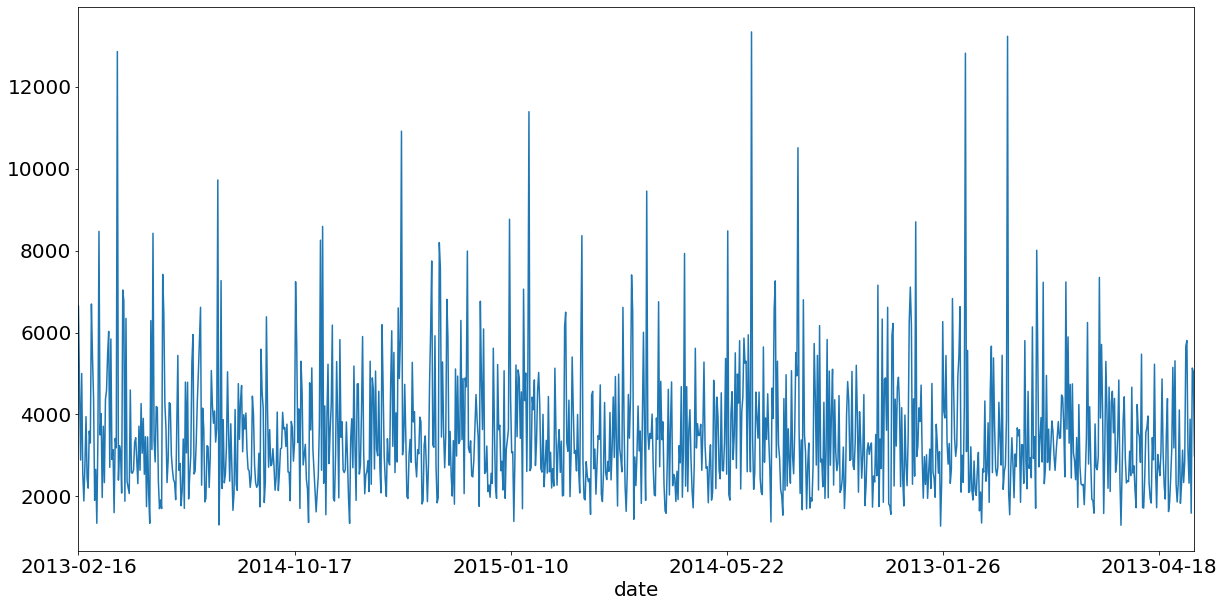

In [13]:
spark.sql("""
SELECT date_format(from_unixtime(unix_timestamp(date, 'dd.MM.yyyy')), "yyyy-MM-dd") AS date
,   SUM(item_cnt_day) AS items_sold
FROM sales
GROUP BY date
""").toPandas()\
    .set_index("date")['items_sold'].plot()
plt.show()

In [35]:
sales_sdf\
    .withColumn("date", F.unix_timestamp(F.col("date"), 'dd.MM.yyyy'))\
    .groupBy(F.col("date"))\
    .agg(F.sum(F.col("item_cnt_day")).alias("items_sold"))\
    .show()

+----------+----------+
|      date|items_sold|
+----------+----------+
|1364940000|    2579.0|
|1377986400|    5439.0|
|1409263200|    3536.0|
|1427583600|    3026.0|
|1429567200|    2150.0|
|1435615200|    1809.0|
|1443564000|    4068.0|
|1359327600|    2852.0|
|1360278000|    4430.0|
|1370210400|    3239.0|
|1377295200|    5667.0|
|1393628400|    5871.0|
|1360969200|    6643.0|
|1365544800|    2835.0|
|1373580000|    4161.0|
|1387666800|    7749.0|
|1390950000|    2640.0|
|1401400800|    4487.0|
|1404338400|    2764.0|
|1412028000|    2749.0|
+----------+----------+
only showing top 20 rows



__Exercise__ For each day what is total daily revenue? Output table should have columns `date`, `total_revenue`.

## Joins

In [18]:
shops_sdf = spark.read.option("header", "true").csv("data/shops.csv")

In [19]:
shops_sdf.show(truncate=False)

+----------------------------------+-------+
|shop_name                         |shop_id|
+----------------------------------+-------+
|!Якутск Орджоникидзе, 56 фран     |0      |
|"!Якутск ТЦ ""Центральный"" фран" |1      |
|"Адыгея ТЦ ""Мега"""              |2      |
|"Балашиха ТРК ""Октябрь-Киномир"""|3      |
|"Волжский ТЦ ""Волга Молл"""      |4      |
|"Вологда ТРЦ ""Мармелад"""        |5      |
|Воронеж (Плехановская, 13)        |6      |
|"Воронеж ТРЦ ""Максимир"""        |7      |
|"Воронеж ТРЦ Сити-Парк ""Град"""  |8      |
|Выездная Торговля                 |9      |
|Жуковский ул. Чкалова 39м?        |10     |
|Жуковский ул. Чкалова 39м²        |11     |
|Интернет-магазин ЧС               |12     |
|"Казань ТЦ ""Бехетле"""           |13     |
|"Казань ТЦ ""ПаркХаус"" II"       |14     |
|"Калуга ТРЦ ""XXI век"""          |15     |
|"Коломна ТЦ ""Рио"""              |16     |
|"Красноярск ТЦ ""Взлетка Плаза""" |17     |
|"Красноярск ТЦ ""Июнь"""          |18     |
|"Курск ТЦ

In [20]:
shops_sdf.createOrReplaceTempView("shops")

In [21]:
spark.sql("""
SELECT sales.shop_id
,   shops.shop_name
FROM (
    SELECT DISTINCT shop_id
    FROM sales)  sales
LEFT JOIN shops
ON sales.shop_id == shops.shop_id
""").show(truncate=False)

+-------+--------------------------------------+
|shop_id|shop_name                             |
+-------+--------------------------------------+
|7      |"Воронеж ТРЦ ""Максимир"""            |
|51     |"Тюмень ТЦ ""Зеленый Берег"""         |
|15     |"Калуга ТРЦ ""XXI век"""              |
|54     |"Химки ТЦ ""Мега"""                   |
|11     |Жуковский ул. Чкалова 39м²            |
|29     |"Москва ТЦ ""Новый век"" (Новокосино)"|
|42     |"СПб ТК ""Невский Центр"""            |
|3      |"Балашиха ТРК ""Октябрь-Киномир"""    |
|30     |"Москва ТЦ ""Перловский"""            |
|34     |"Н.Новгород ТРЦ ""РИО"""              |
|59     |"Ярославль ТЦ ""Альтаир"""            |
|8      |"Воронеж ТРЦ Сити-Парк ""Град"""      |
|22     |Москва Магазин С21                    |
|28     |"Москва ТЦ ""МЕГА Теплый Стан"" II"   |
|16     |"Коломна ТЦ ""Рио"""                  |
|35     |"Н.Новгород ТРЦ ""Фантастика"""       |
|52     |"Уфа ТК ""Центральный"""              |
|0      |!Якутск Орд

In [22]:
sales_sdf\
    .select("shop_id")\
    .distinct()\
    .join(shops_sdf, "shop_id", how="left")\
    .select("shop_id", "shop_name")\
    .show(truncate=False)

+-------+--------------------------------------+
|shop_id|shop_name                             |
+-------+--------------------------------------+
|7      |"Воронеж ТРЦ ""Максимир"""            |
|51     |"Тюмень ТЦ ""Зеленый Берег"""         |
|15     |"Калуга ТРЦ ""XXI век"""              |
|54     |"Химки ТЦ ""Мега"""                   |
|11     |Жуковский ул. Чкалова 39м²            |
|29     |"Москва ТЦ ""Новый век"" (Новокосино)"|
|42     |"СПб ТК ""Невский Центр"""            |
|3      |"Балашиха ТРК ""Октябрь-Киномир"""    |
|30     |"Москва ТЦ ""Перловский"""            |
|34     |"Н.Новгород ТРЦ ""РИО"""              |
|59     |"Ярославль ТЦ ""Альтаир"""            |
|8      |"Воронеж ТРЦ Сити-Парк ""Град"""      |
|22     |Москва Магазин С21                    |
|28     |"Москва ТЦ ""МЕГА Теплый Стан"" II"   |
|16     |"Коломна ТЦ ""Рио"""                  |
|35     |"Н.Новгород ТРЦ ""Фантастика"""       |
|52     |"Уфа ТК ""Центральный"""              |
|0      |!Якутск Орд

__Exercise__ Find a product with highest sell. What is its name? (hint use `items.csv`)

In [23]:
# example with cache
# example using struct data
# example using subqueries (explicit or as two dataframes)

__Exercise__ For each day in August 2015 find shop name with maximal sales.

## Window functions

First let's correct the date.

In [24]:
spark.sql("""
SELECT *
,   date_format(from_unixtime(unix_timestamp(date, 'dd.MM.yyyy')), "yyyy-MM-dd") AS date_iso
FROM sales
""").createOrReplaceTempView("sales_iso")

In [25]:
sales_iso_sdf = sales_sdf\
    .withColumn(
    "date_iso", 
    F.unix_timestamp(F.col("date"), 'dd.MM.yyyy'))
sales_iso_sdf.show()

+----------+--------------+-------+-------+----------+------------+----------+
|      date|date_block_num|shop_id|item_id|item_price|item_cnt_day|  date_iso|
+----------+--------------+-------+-------+----------+------------+----------+
|02.01.2013|             0|     59|  22154|     999.0|         1.0|1357084800|
|03.01.2013|             0|     25|   2552|     899.0|         1.0|1357171200|
|05.01.2013|             0|     25|   2552|     899.0|        -1.0|1357344000|
|06.01.2013|             0|     25|   2554|   1709.05|         1.0|1357430400|
|15.01.2013|             0|     25|   2555|    1099.0|         1.0|1358208000|
|10.01.2013|             0|     25|   2564|     349.0|         1.0|1357776000|
|02.01.2013|             0|     25|   2565|     549.0|         1.0|1357084800|
|04.01.2013|             0|     25|   2572|     239.0|         1.0|1357257600|
|11.01.2013|             0|     25|   2572|     299.0|         1.0|1357862400|
|03.01.2013|             0|     25|   2573|     299.

In [26]:
spark.sql("""
SELECT shop_id
,   item_id
,   date_iso
,   item_cnt_day
,   LEAD(item_cnt_day) OVER 
        (PARTITION BY shop_id, item_id ORDER BY date_iso) as lead_item_cnt_day
FROM sales_iso
ORDER BY shop_id
,   item_id
,   date_iso
""").show()

+-------+-------+----------+------------+-----------------+
|shop_id|item_id|  date_iso|item_cnt_day|lead_item_cnt_day|
+-------+-------+----------+------------+-----------------+
|      0|   1000|2013-01-03|         1.0|              1.0|
|      0|   1000|2013-01-08|         1.0|              1.0|
|      0|   1000|2013-01-09|         1.0|              1.0|
|      0|   1000|2013-01-10|         1.0|              1.0|
|      0|   1000|2013-01-20|         1.0|              1.0|
|      0|   1000|2013-02-15|         1.0|              1.0|
|      0|   1000|2013-02-16|         1.0|              1.0|
|      0|   1000|2013-02-17|         1.0|              1.0|
|      0|   1000|2013-02-27|         1.0|             null|
|      0|  10004|2013-02-09|         1.0|             null|
|      0|   1001|2013-01-03|         1.0|              1.0|
|      0|   1001|2013-01-12|         1.0|             null|
|      0|  10012|2013-01-22|         1.0|              1.0|
|      0|  10012|2013-02-14|         1.0

In [27]:
from pyspark.sql import Window

sales_iso_sdf.select(
    F.col("shop_id"),   
    F.col("item_id"),   
    F.col("date_iso"),   
    F.col("item_cnt_day"),   
    F.lead(F.col("item_cnt_day"))\
        .over(Window.partitionBy("shop_id", "item_id").orderBy('date_iso'))\
        .alias("lead_item_cnt_day")
).orderBy("shop_id", "item_id", "date_iso").show()


+-------+-------+----------+------------+-----------------+
|shop_id|item_id|  date_iso|item_cnt_day|lead_item_cnt_day|
+-------+-------+----------+------------+-----------------+
|      0|   1000|1357171200|         1.0|              1.0|
|      0|   1000|1357603200|         1.0|              1.0|
|      0|   1000|1357689600|         1.0|              1.0|
|      0|   1000|1357776000|         1.0|              1.0|
|      0|   1000|1358640000|         1.0|              1.0|
|      0|   1000|1360886400|         1.0|              1.0|
|      0|   1000|1360972800|         1.0|              1.0|
|      0|   1000|1361059200|         1.0|              1.0|
|      0|   1000|1361923200|         1.0|             null|
|      0|  10004|1360368000|         1.0|             null|
|      0|   1001|1357171200|         1.0|              1.0|
|      0|   1001|1357948800|         1.0|             null|
|      0|  10012|1358812800|         1.0|              1.0|
|      0|  10012|1360800000|         1.0

In [28]:
window = Window.partitionBy("shop_id", "item_id").orderBy('date_iso')

sales_iso_sdf.select(
    F.col("shop_id"),   
    F.col("item_id"),   
    F.col("date_iso"),   
    F.col("item_cnt_day"),   
    F.lead(F.col("item_cnt_day"))\
        .over(window)\
        .alias("lead_item_cnt_day")
).orderBy("shop_id", "item_id", "date_iso").show()


+-------+-------+----------+------------+-----------------+
|shop_id|item_id|  date_iso|item_cnt_day|lead_item_cnt_day|
+-------+-------+----------+------------+-----------------+
|      0|   1000|1357171200|         1.0|              1.0|
|      0|   1000|1357603200|         1.0|              1.0|
|      0|   1000|1357689600|         1.0|              1.0|
|      0|   1000|1357776000|         1.0|              1.0|
|      0|   1000|1358640000|         1.0|              1.0|
|      0|   1000|1360886400|         1.0|              1.0|
|      0|   1000|1360972800|         1.0|              1.0|
|      0|   1000|1361059200|         1.0|              1.0|
|      0|   1000|1361923200|         1.0|             null|
|      0|  10004|1360368000|         1.0|             null|
|      0|   1001|1357171200|         1.0|              1.0|
|      0|   1001|1357948800|         1.0|             null|
|      0|  10012|1358812800|         1.0|              1.0|
|      0|  10012|1360800000|         1.0

__Exercise__ What is moving average (+-3 days) of total daily revenue?

## Extra Exercises

* Which shop had the highest sells in August 2015. What was his name?
* What is the name of category of with the highest monthly sells. 

# DataFrame as an RDD of Rows

In [11]:
type(sales_sdf)

pyspark.sql.dataframe.DataFrame

In [20]:
row = sales_sdf.first()
row

Row(date='02.01.2013', date_block_num='0', shop_id='59', item_id='22154', item_price='999.0', item_cnt_day='1.0')

In [21]:
print(row.date)
print(row['date_block_num'])
row.asDict()

02.01.2013
0


{'date': '02.01.2013',
 'date_block_num': '0',
 'shop_id': '59',
 'item_id': '22154',
 'item_price': '999.0',
 'item_cnt_day': '1.0'}

In [17]:
sales_sdf.rdd.take(5)

[Row(date='02.01.2013', date_block_num='0', shop_id='59', item_id='22154', item_price='999.0', item_cnt_day='1.0'),
 Row(date='03.01.2013', date_block_num='0', shop_id='25', item_id='2552', item_price='899.0', item_cnt_day='1.0'),
 Row(date='05.01.2013', date_block_num='0', shop_id='25', item_id='2552', item_price='899.0', item_cnt_day='-1.0'),
 Row(date='06.01.2013', date_block_num='0', shop_id='25', item_id='2554', item_price='1709.05', item_cnt_day='1.0'),
 Row(date='15.01.2013', date_block_num='0', shop_id='25', item_id='2555', item_price='1099.0', item_cnt_day='1.0')]

In [67]:
print(sales_sdf.rdd.toDebugString().decode())

(1) MapPartitionsRDD[17] at javaToPython at NativeMethodAccessorImpl.java:0 []
 |  MapPartitionsRDD[16] at javaToPython at NativeMethodAccessorImpl.java:0 []
 |  SQLExecutionRDD[15] at javaToPython at NativeMethodAccessorImpl.java:0 []
 |  MapPartitionsRDD[14] at javaToPython at NativeMethodAccessorImpl.java:0 []
 |  FileScanRDD[13] at javaToPython at NativeMethodAccessorImpl.java:0 []


In [32]:
sales_per_day = sales_sdf\
    .groupBy(F.col("date"))\
    .agg(F.sum(F.col("item_cnt_day")))

print(sales_per_day.rdd.toDebugString().decode())

(200) MapPartitionsRDD[128] at javaToPython at NativeMethodAccessorImpl.java:0 []
  |   MapPartitionsRDD[127] at javaToPython at NativeMethodAccessorImpl.java:0 []
  |   SQLExecutionRDD[126] at javaToPython at NativeMethodAccessorImpl.java:0 []
  |   MapPartitionsRDD[125] at javaToPython at NativeMethodAccessorImpl.java:0 []
  |   ShuffledRowRDD[124] at javaToPython at NativeMethodAccessorImpl.java:0 []
  +-(1) MapPartitionsRDD[123] at javaToPython at NativeMethodAccessorImpl.java:0 []
     |  MapPartitionsRDD[122] at javaToPython at NativeMethodAccessorImpl.java:0 []
     |  MapPartitionsRDD[121] at javaToPython at NativeMethodAccessorImpl.java:0 []
     |  FileScanRDD[120] at javaToPython at NativeMethodAccessorImpl.java:0 []
